In [1]:
# computational import
import numpy as np
import xarray as xr

# plotting import
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.gridspec as gridspec
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import cartopy.feature as cfeature
import cmocean

In [2]:
# open dataset step 7
var = xr.open_dataset('/Users/elifaigle/Desktop/aws/variance/hycom_variance_step_7_0m.nc')
var15 = xr.open_dataset('/Users/elifaigle/Desktop/aws/variance/hycom_variance_step_7_15m.nc')

In [3]:
# view dataset contents
var

<xarray.Dataset>
Dimensions:  (lon: 719, lat: 359)
Coordinates:
  * lon      (lon) float32 -180.0 -179.5 -179.0 -178.5 ... 178.5 179.0 179.5
  * lat      (lat) float32 -90.0 -89.5 -89.0 -88.5 ... 87.99 88.5 89.0 89.5
Data variables:
    eul_var  (lon, lat) float64 ...
    lag_var  (lon, lat) float64 ...

In [4]:
# declare bins for plotting
lon = np.linspace(-180,180, 360*2)
lat = np.linspace(-90, 90, 180*2)

/Users/elifaigle/anaconda3/envs/shanevenv/lib/python3.11/site-packages/xarray/core/computation.py:822: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)
/Users/elifaigle/anaconda3/envs/shanevenv/lib/python3.11/site-packages/xarray/core/computation.py:822: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)
/Users/elifaigle/anaconda3/envs/shanevenv/lib/python3.11/site-packages/xarray/core/computation.py:822: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)
/Users/elifaigle/anaconda3/envs/shanevenv/lib/python3.11/site-packages/xarray/core/computation.py:822: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)
/var/folders/sp/w25h36ts7mjblxp7wdbshfvm0000gn/T/ipykernel_29878/1947252257.py:99: RuntimeWarning: divide by zero encountered in log10
  image5 = ax5.pcolormesh(xedges, yedges, np.log10(H), cmap = cmap)
/var/folders/sp/w25h36ts7mjblxp7wdbshfvm0

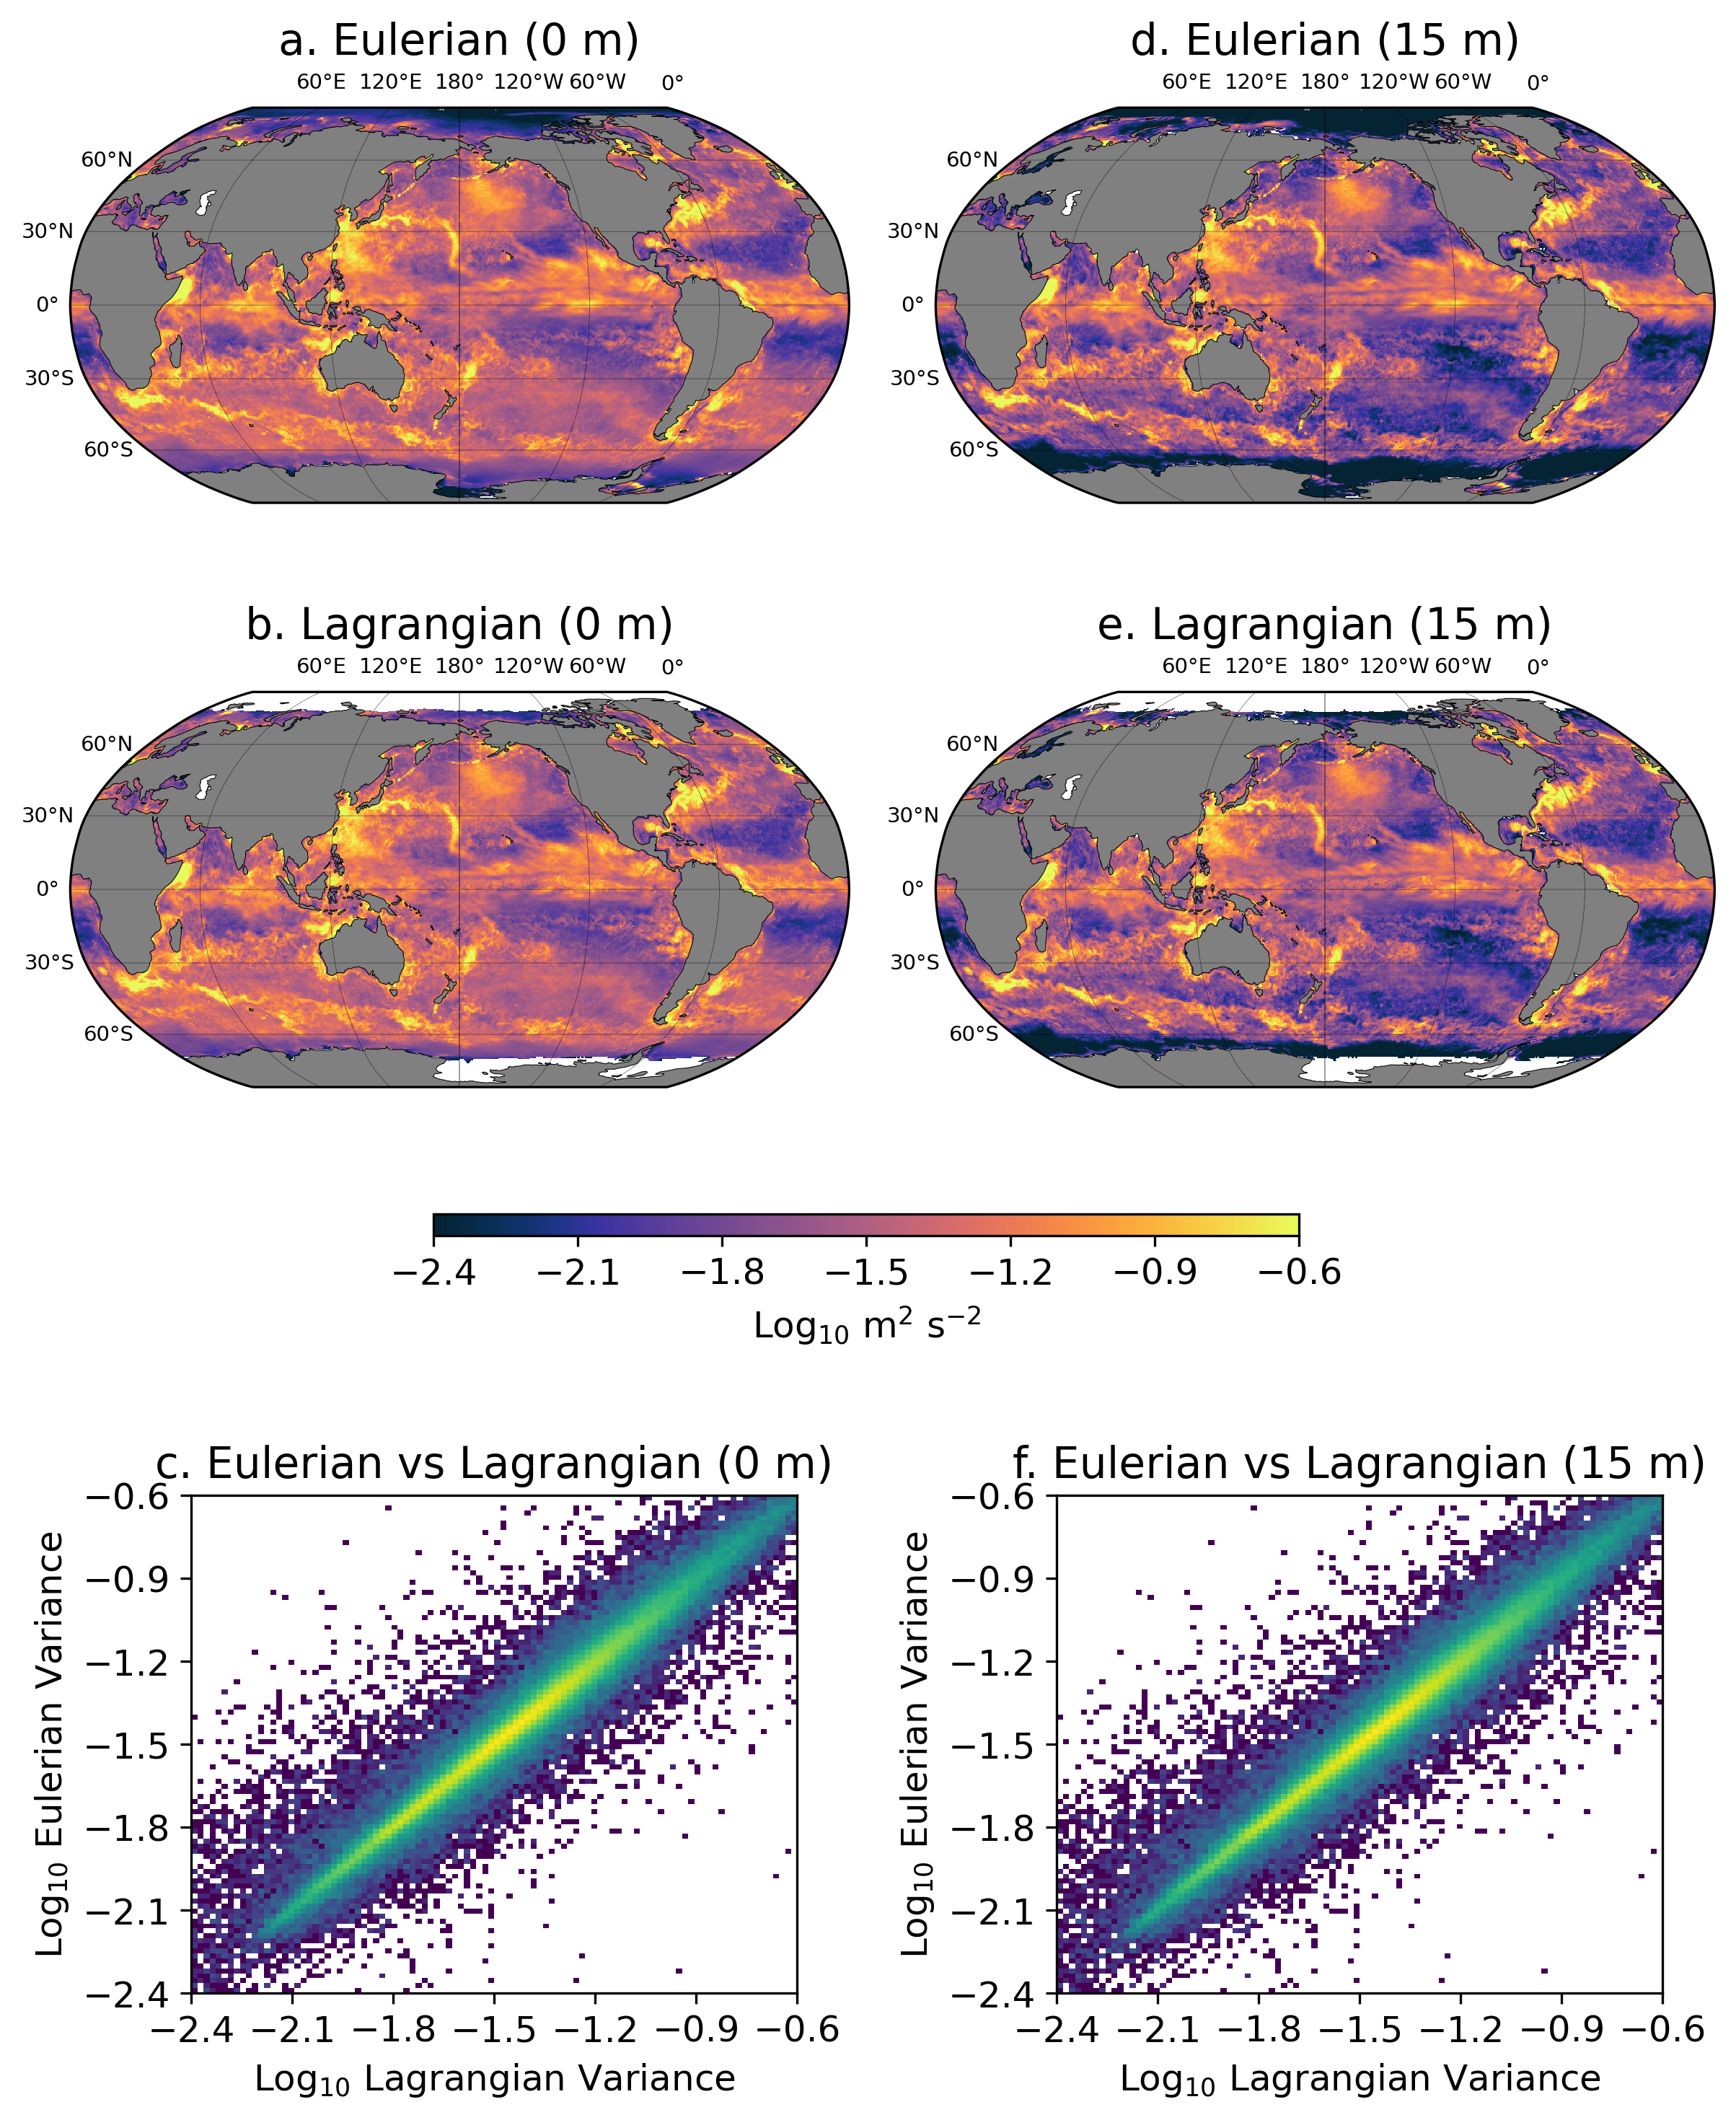

In [9]:
# choose font size and family
plt.rcParams.update({'font.size': 12, 'font.family': 'sans-serif'})
# create figure
fig = plt.figure(figsize = (8,10), dpi = 300)
# define cmap
cmap = plt.colormaps.get_cmap('cmo.thermal')

# create first subplot
ax1 = fig.add_subplot(3,2,1, projection=ccrs.Robinson(central_longitude=-180))
image1 = ax1.pcolormesh(lon, lat,
(np.log10((var['eul_var'].transpose()))), 
cmap=cmap, 
transform=ccrs.PlateCarree(),
vmin=-2.4, vmax=-0.6) 

# gridlines and labels
gl = ax1.gridlines(color='k', linewidth=0.1, linestyle='-',
xlocs=np.arange(-180, 181, 60), ylocs=np.arange(-90, 91, 30),
draw_labels=True)
gl.bottom_labels = False
gl.right_labels = False

# add land and coastline
ax1.add_feature(cfeature.LAND, facecolor='grey', zorder=1)
ax1.add_feature(cfeature.COASTLINE, linewidth=0.25, zorder=1)
ax1.set_title('a. Eulerian (0 m)');

# second subplot  
ax2 = fig.add_subplot(3,2,2, projection=ccrs.Robinson(central_longitude=-180))
image2 = ax2.pcolormesh(lon, lat,
(np.log10((var15['eul_var'].transpose()))), 
cmap=cmap, 
transform=ccrs.PlateCarree(),
vmin=-2.4, vmax=-0.6) 

# gridlines and labels
gl = ax2.gridlines(color='k', linewidth=0.1, linestyle='-',
xlocs=np.arange(-180, 181, 60), ylocs=np.arange(-90, 91, 30),
draw_labels=True)
gl.bottom_labels = False
gl.right_labels = False

# add land and coastline
ax2.add_feature(cfeature.LAND, facecolor='grey', zorder=1)
ax2.add_feature(cfeature.COASTLINE, linewidth=0.25, zorder=1)
ax2.set_title('d. Eulerian (15 m)');

# third subplot
ax3 = fig.add_subplot(3,2,3, projection=ccrs.Robinson(central_longitude=-180))
image3 = ax3.pcolormesh(lon, lat,
(np.log10((var['lag_var'].transpose()))), 
cmap=cmap, 
transform=ccrs.PlateCarree(),
vmin=-2.4, vmax=-0.6) 

# gridlines and labels
gl = ax3.gridlines(color='k', linewidth=0.1, linestyle='-',
xlocs=np.arange(-180, 181, 60), ylocs=np.arange(-90, 91, 30),
draw_labels=True)
gl.bottom_labels = False
gl.right_labels = False

# add land and coastline
ax3.add_feature(cfeature.LAND, facecolor='grey', zorder=1)
ax3.add_feature(cfeature.COASTLINE, linewidth=0.25, zorder=1)
ax3.set_title('b. Lagrangian (0 m)');

# fourth subplot
ax4 = fig.add_subplot(3,2,4, projection=ccrs.Robinson(central_longitude=-180))
image4 = ax4.pcolormesh(lon, lat,
(np.log10((var15['lag_var'].transpose()))), 
cmap=cmap, 
transform=ccrs.PlateCarree(),
vmin=-2.4, vmax=-0.6) 

# gridlines and labels
gl = ax4.gridlines(color='k', linewidth=0.1, linestyle='-',
xlocs=np.arange(-180, 181, 60), ylocs=np.arange(-90, 91, 30),
draw_labels=True)
gl.bottom_labels = False
gl.right_labels = False

# add land and coastline
ax4.add_feature(cfeature.LAND, facecolor='grey', zorder=1)
ax4.add_feature(cfeature.COASTLINE, linewidth=0.25, zorder=1)
ax4.set_title('e. Lagrangian (15 m)');

# create axis for colorbar and plot
cbar_ax = fig.add_axes([0.25, 0.42, 0.5, 0.01]) # left, bottom, width, height
fig.colorbar(image1, cax=cbar_ax, orientation = 'horizontal', label = 'Log$_{10}$ m$^2$ s$^{-2}$', ticks = np.linspace(-2.4, -0.6, 7))

# fifth subplot
ax5 = fig.add_subplot(3,2,5)
# create histogram
H, yedges, xedges = np.histogram2d(x = np.log10(var['eul_var'].values.flatten()), 
                                   y = np.log10(var['lag_var']).values.flatten(), bins = 100, range = [[-2.4,-0.6], [-2.4, -0.6]] )
# plot histogram
cmap = plt.cm.viridis
image5 = ax5.pcolormesh(xedges, yedges, np.log10(H), cmap = cmap)
ax5.set_title('c. Eulerian vs Lagrangian (0 m)')
ax5.set_ylim(-2.4, -0.6)
ax5.set_xlim(-2.4, -0.6)
ax5.set_xticks(np.linspace(-2.4, -0.6, 7))
ax5.set_yticks(np.linspace(-2.4, -0.6, 7))
ax5.set_xlabel('Log$_{10}$ Lagrangian Variance')
ax5.set_ylabel('Log$_{10}$ Eulerian Variance')

# sixth subplot
ax6 = fig.add_subplot(3,2,6)
# create histogram
H, yedges, xedges = np.histogram2d(x = np.log10(var['eul_var'].values.flatten()), 
                                   y = np.log10(var['lag_var']).values.flatten(), bins = 100, range = [[-2.4,-0.6], [-2.4, -0.6]])
# plot histogram
cmap = plt.cm.viridis
image6 = ax6.pcolormesh(xedges, yedges, np.log10(H), cmap = cmap)
ax6.set_title('f. Eulerian vs Lagrangian (15 m)')
ax6.set_ylim(-2.4, -0.6)
ax6.set_xlim(-2.4, -0.6)
ax6.set_xticks(np.linspace(-2.4, -0.6, 7))
ax6.set_yticks(np.linspace(-2.4, -0.6, 7))
ax6.set_xlabel('Log$_{10}$ Lagrangian Variance')
ax6.set_ylabel('Log$_{10}$ Eulerian Variance')

# set font size for lat/lon labels
plt.rcParams.update({'font.size': 7, 'font.family': 'sans-serif'})

# Set positions for each subplot
ax1.set_position([0.04, 0.7, 0.45, 0.3])  # left, bottom, width, height
ax2.set_position([0.54, 0.7, 0.45, 0.3])
ax3.set_position([0.04, 0.43, 0.45, 0.3])
ax4.set_position([0.54, 0.43, 0.45, 0.3])
ax5.set_position([0.11, 0.07, 0.35, 0.23])
ax6.set_position([0.61, 0.07, 0.35, 0.23])
plt.savefig('/Users/elifaigle/Desktop/var_2dhist_subplot.png', dpi = 300, format = 'png')